In [54]:
#PROBLEM STATEMENT
#PREDICT THE SURVIVAL CHANGE OF ANY PASSENGER LIVE or DEAD

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data=pd.read_csv(r"C:\Users\ShivamRaghav\Downloads\Train titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data.shape

(891, 12)

In [58]:
# missing vlaues with percentage
per=data.isnull().sum()/len(data)
per

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [59]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
##**Now here we will drop Cabin column as it conatin more than 70% of data missing
##and we will also drop PassengerID as it only show conatnt increment and last the name one is also not important**

In [61]:
data=data.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:ylabel='Frequency'>

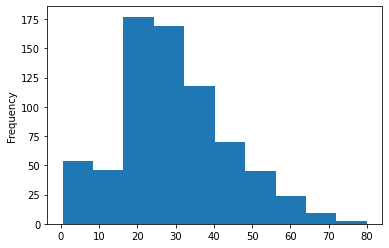

In [62]:
#now we know that age is missing and Embarked is missing
data["Age"].plot.hist()

In [63]:
#best method median()
data["Age"].fillna(data["Age"].median(),inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [64]:
#explore datatype of each columns
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [65]:
#max count or mode fill
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
data["Embarked"].fillna("S",inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [67]:
#using map
data["Embarked"]=data["Embarked"].map({"S":0,"Q":1,"C":2})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,2
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,0


In [68]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [69]:
#SEPERATE OUT: DEPENDENT AND INDEPENDENT
Y=data["Survived"]
X=data.iloc[0:,1:]

In [70]:
#FEATURE SELECTION : STATSMODELS.API
import statsmodels.api as sm
x=sm.add_constant(X)

In [71]:
x

,const,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,3,1,22.0,1,0,7.2500,0
1,1.0,1,0,38.0,1,0,71.2833,2
2,1.0,3,0,26.0,0,0,7.9250,0
3,1.0,1,0,35.0,1,0,53.1000,0
4,1.0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,1.0,2,1,27.0,0,0,13.0000,0
887,1.0,1,0,19.0,0,0,30.0000,0
888,1.0,3,0,28.0,1,2,23.4500,0
889,1.0,1,1,26.0,0,0,30.0000,2


In [72]:
model=sm.Logit(Y,x).fit()

Optimization terminated successfully.
         Current function value: 0.440910
         Iterations 6


In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Jan 2021   Pseudo R-squ.:                  0.3379
Time:                        17:02:53   Log-Likelihood:                -392.85
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.489e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8230      0.535      9.023      0.000       3.775       5.871
Pclass        -1.0868      0.140     -7.783      0.000      -1.361      -0.813
Sex           -2.7399      0.199    -13.773      0.000      -3.130      -2.350
Age           -0.0389      0.008     -4.977      0.000      -0.054      -0.024
SibSp         -0.3271      0.109     -2.995      0.003      -0.541      -0.113
Parch         -0.0961      0.118     -0.815      0.415      -0.327       0.135
Fare           0.0020      0.002      0.833      0.405      -0.003       0.007
Embarked       0.2150      0.115      1.870      0.061      -0.010       0.440
==============================================================================
"""

In [74]:
#Parch drop again iterate your model
x=x.drop(["Parch"],axis=1)
model=sm.Logit(Y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.441288
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Jan 2021   Pseudo R-squ.:                  0.3373
Time:                        17:02:53   Log-Likelihood:                -393.19
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.434e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8044      0.533      9.020      0.000       3.760       5.848
Pclass        -1.0982      0.139     -7.922      0.000      -1.370      -0.827
Sex           -2.7081      0.194    -13.927      0.000      -3.089      -2.327
Age           -0.0387      0.008     -4.958      0.000      -0.054      -0.023
SibSp         -0.3506      0.106     -3.312      0.001      -0.558      -0.143
Fare           0.0016      0.002      0.686      0.492      -0.003       0.006
Embarked       0.2196      0.115      1.914      0.056      -0.005       0.444
==============================================================================
"""

In [75]:
#FARE: 
x=x.drop(["Fare"],axis=1)
model=sm.Logit(Y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.441565
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Jan 2021   Pseudo R-squ.:                  0.3369
Time:                        17:02:53   Log-Likelihood:                -393.43
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.298e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9553      0.487     10.185      0.000       4.002       5.909
Pclass        -1.1455      0.121     -9.467      0.000      -1.383      -0.908
Sex           -2.7158      0.194    -13.991      0.000      -3.096      -2.335
Age           -0.0389      0.008     -4.996      0.000      -0.054      -0.024
SibSp         -0.3356      0.103     -3.247      0.001      -0.538      -0.133
Embarked       0.2352      0.112      2.092      0.036       0.015       0.455
==============================================================================
"""

In [76]:
X=x.iloc[0:,1:]

In [77]:
#DATA NORMALIZING

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.82737724,  0.73769513, -0.56573646,  0.43279337, -0.58595414],
       [-1.56610693, -1.35557354,  0.66386103,  0.43279337,  1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, -0.4745452 , -0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 ,  0.43279337, -0.58595414],
       [-1.56610693,  0.73769513, -0.25833709, -0.4745452 ,  1.9423032 ],
       [ 0.82737724,  0.73769513,  0.20276197, -0.4745452 ,  0.67817453]])

In [79]:
df=pd.DataFrame(data=X,columns=["Pclass","Sex","Age","SibSp","Embarked"])
df.head()

,Pclass,Sex,Age,SibSp,Embarked
0,0.827377,0.737695,-0.565736,0.432793,-0.585954
1,-1.566107,-1.355574,0.663861,0.432793,1.942303
2,0.827377,-1.355574,-0.258337,-0.474545,-0.585954
3,-1.566107,-1.355574,0.433312,0.432793,-0.585954
4,0.827377,0.737695,0.433312,-0.474545,-0.585954


In [80]:
#MODEL SELECTION AND TRAINING

In [81]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()

In [82]:
#model training on normalize data
Lr.fit(df,Y)

LogisticRegression()

In [83]:
#score
Lr.score(df,Y)

0.8002244668911336

In [84]:
path= r"‪C:\Users\ShivamRaghav\Downloads\testing.csv" 
path 

'\u202aC:\\Users\\ShivamRaghav\\Downloads\\testing.csv'

In [ ]:
#"OSError: [Errno 22] Invalid argument"

In [85]:
path= r"‪C:\Users\ShivamRaghav\Downloads\testing.csv"
path=path.lstrip("\u202a")  

In [86]:
path #corrected path

'C:\\Users\\ShivamRaghav\\Downloads\\testing.csv'

In [87]:
test=pd.read_csv(path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
test=test.loc[0:,["Pclass","Sex","Age","SibSp","Embarked"]]
test.head()

,Pclass,Sex,Age,SibSp,Embarked
0,3,male,34.5,0,Q
1,3,female,47.0,1,S
2,2,male,62.0,0,Q
3,3,male,27.0,0,S
4,3,female,22.0,1,S


In [89]:
test["Age"].fillna(test["Age"].median(),inplace=True)

In [90]:
#using map
test["Embarked"]=test["Embarked"].map({"S":0,"Q":1,"C":2})
test.head()

,Pclass,Sex,Age,SibSp,Embarked
0,3,male,34.5,0,1
1,3,female,47.0,1,0
2,2,male,62.0,0,1
3,3,male,27.0,0,0
4,3,female,22.0,1,0


In [91]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test["Sex"]=le.fit_transform(test["Sex"])
test.head()

,Pclass,Sex,Age,SibSp,Embarked
0,3,1,34.5,0,1
1,3,0,47.0,1,0
2,2,1,62.0,0,1
3,3,1,27.0,0,0
4,3,0,22.0,1,0


In [92]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test=sc.fit_transform(test)
test

array([[ 0.87348191,  0.75592895,  0.38623105, -0.49947002,  0.47091535],
       [ 0.87348191, -1.32287566,  1.37137004,  0.61699237, -0.70076689],
       [-0.31581919,  0.75592895,  2.55353683, -0.49947002,  0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.70147553, -0.49947002, -0.70076689],
       [ 0.87348191,  0.75592895, -0.20485235, -0.49947002, -0.70076689],
       [ 0.87348191,  0.75592895, -0.20485235,  0.61699237,  1.64259759]])

In [93]:
#PREDICTION Y:SURVIVED ON BASIS OF THIS TEST DATA
pred=Lr.predict(test)

In [94]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [95]:
DF=pd.read_csv(path)
#colum add DF of prediction
DF["PREDICTON"]=pred
#to_csv: dataframe convert into csv file
DF.to_csv(r"D:\Abhinash sir ML notes\11\prediction_titanic.csv")

In [96]:
DF


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PREDICTON
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
